<a href="https://colab.research.google.com/github/kristinacovington/Colab/blob/master/Python%20Machine%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Machine Learning

Notes from http://scipy-lectures.org/ and Building Machine Learning Systems with Python by Willi Richert and Luis Pedro Coelho


importing numpy, scipy and matplotlib

In [386]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import sklearn as sl

## NumPy


### NumPy Arrays

* extension package to Python for **multi-dimensional arrays**
* designed for scientific computation (**convenience**)
* **Memory-efficient** container that provides **fast numerical operations**.


In [6]:
L = range(1000)
%timeit [i**2 for i in L]

a = np.arange(1000)
%timeit a**2


1000 loops, best of 3: 237 µs per loop
The slowest run took 34.29 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 1.22 µs per loop


### numpy.reshape

**Gives a new shape to an array without changing its data.**

create a array

In [432]:
a = np.array([0,1,2,3,4,5])
a

array([0, 1, 2, 3, 4, 5])

operations are propagated to individual elements

In [42]:
a*2

array([ 0,  2,  4,  6,  8, 10])

b is reshaped to a multi-dimensional array

In [433]:
b = a.reshape((3,2))
b

array([[0, 1],
       [2, 3],
       [4, 5]])

### numpy.copy

modify element in b

In [46]:
b[1][0]=77
b

array([[ 0,  1],
       [77,  3],
       [ 4,  5]])

a got modified because **numpy optimization avoids copying**

In [47]:
a

array([ 0,  1, 77,  3,  4,  5])

create a true copy of a

In [437]:
c = a.reshape((3,2)).copy()
c[0][0] = -99
c

array([[-99,   1],
       [  2,   3],
       [  4,   5]])

verify c is a true copy of a

In [49]:
a

array([ 0,  1, 77,  3,  4,  5])

### numpy.flatten

flattens our array

In [438]:
c.flatten()

array([-99,   1,   2,   3,   4,   5])

### numpy.empty

empty, unlike zeros, **does not set the array values to zero, and may therefore be marginally faster**. On the other hand, it requires the user to manually set all the values in the array, and should be used with caution.

In [50]:
np.empty([2, 2])

array([[278.877     ,  61.67181713],
       [294.752     ,  71.67181713]])

### numpy.ma

**dealing with (propagation of) missing data**

**numpy.genfromtxt** does similar for txt files

In [55]:
x = np.ma.array([1, 2, 3, 4], mask=[0, 1, 0, 1])
x

masked_array(data=[1, --, 3, --],
             mask=[False,  True, False,  True],
       fill_value=999999)

### numpy.linspace

evenly spaced numbers over a specified interval

In [429]:
days = np.linspace(0, 1, num=60)
days

array([0.        , 0.01694915, 0.03389831, 0.05084746, 0.06779661,
       0.08474576, 0.10169492, 0.11864407, 0.13559322, 0.15254237,
       0.16949153, 0.18644068, 0.20338983, 0.22033898, 0.23728814,
       0.25423729, 0.27118644, 0.28813559, 0.30508475, 0.3220339 ,
       0.33898305, 0.3559322 , 0.37288136, 0.38983051, 0.40677966,
       0.42372881, 0.44067797, 0.45762712, 0.47457627, 0.49152542,
       0.50847458, 0.52542373, 0.54237288, 0.55932203, 0.57627119,
       0.59322034, 0.61016949, 0.62711864, 0.6440678 , 0.66101695,
       0.6779661 , 0.69491525, 0.71186441, 0.72881356, 0.74576271,
       0.76271186, 0.77966102, 0.79661017, 0.81355932, 0.83050847,
       0.84745763, 0.86440678, 0.88135593, 0.89830508, 0.91525424,
       0.93220339, 0.94915254, 0.96610169, 0.98305085, 1.        ])

### numpy.clip

**trimming outliers**

In [54]:
 a.clip(0,4)

array([77,  5])

# SciPy and Matplotlib
**scipy : scientific toolkit**

* Linear algebra
* Interpolation
* Optimization and fit
* Statistics and random numbers
* Numerical integration
* Fast Fourier transforms
* Signal processing
* Image manipulation

**matplotlib : visualizing data**


### Optimize and fit

**Curve fitting: temperature as a function of month of the year**

Create data

Text(0, 0.5, 'Min and max temperature')

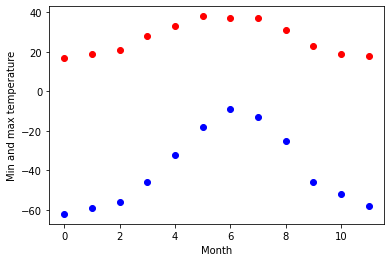

In [61]:
temp_max = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

months = np.arange(12)
plt.plot(months, temp_max, 'ro')
plt.plot(months, temp_min, 'bo')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

Fit to a periodic function

In [104]:
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = sp.optimize.curve_fit(yearly_temps, months,
                                      temp_max, [20, 10, 0])
res_min, cov_min = sp.optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])

Plot the fit

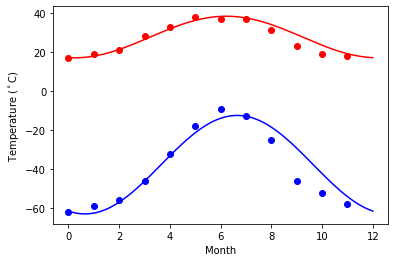

In [63]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

Let's use real data

GLOBAL Land-Ocean Temperature Index in 0.01 degrees Celsius   base period: 1951-1980


In [182]:
# let's exclude the headers and only grab the monthly means
data = np.genfromtxt("https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv",delimiter=',',skip_header=2, usecols = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12))
data

array([[-0.17, -0.23, -0.08, ..., -0.22, -0.21, -0.16],
       [-0.19, -0.13,  0.04, ..., -0.2 , -0.17, -0.05],
       [ 0.18,  0.16,  0.06, ..., -0.23, -0.15, -0.34],
       ...,
       [ 0.82,  0.85,  0.9 , ...,  1.01,  0.83,  0.92],
       [ 0.93,  0.96,  1.18, ...,  1.02,  1.  ,  1.11],
       [ 1.17,  1.25,  1.19, ...,   nan,   nan,   nan]])

Plot color map

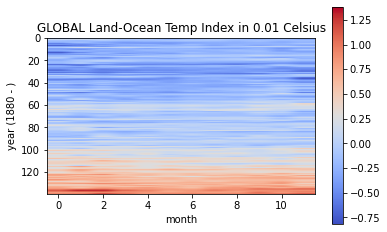

In [184]:
plt.imshow(data, cmap=plt.cm.coolwarm, aspect=0.05)    
plt.colorbar()
plt.title("GLOBAL Land-Ocean Temp Index in 0.01 Celsius")
plt.xlabel("month")
plt.ylabel("year (1880 - )")
plt.show()

Flatten our data


In [388]:
year_data = data.flatten()
year_data
x = range(year_data.size)
y = year_data

Split data into train and test.
We want to preserve the order here, so we can do predictions on the "future".

In [426]:
x_ind = int(len(x) * 0.80)
y_ind = int(len(y) * 0.80)
X_train = x[:x_ind]
y_train = y[:y_ind]
X_test = x[x_ind:]
y_test = y[y_ind:]

error will be calculated as the squared distance of the model's prediction to the real data

In [394]:
def error(f, x, y):
 return np.sum((f(x)-y)**2)

Plot line graph

training error [d=1] : 51.322557 
test error [d=1] : 19.504938 

training error [d=2] : 34.732659 
test error [d=2] : 7.325631 

training error [d=10] : 27.262931 
test error [d=10] : 6.651798 

training error [d=25] : 25.790917 
test error [d=25] : 5.845381 



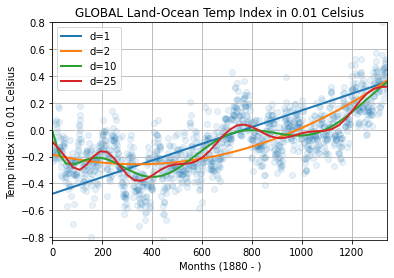

In [428]:
plt.scatter(X_train,y_train,alpha=0.1)
for i in [1,2,10,25]:
  fp1, residuals, rank, sv, rcond = np.polyfit(x, y, i, full=True) # training with least squares polynomial fit
  f1 = np.poly1d(fp1) # this is our model
  print("training error [d=%i] : %f " % (i,error(f1, X_train, y_train)))
  print("test error [d=%i] : %f \n" % (i,error(f1, X_test, y_test)))
  fx = np.linspace(0,X_train[-1]) # generate X-values for plotting
  line, = plt.plot(fx, f1(fx), linewidth=2)
  line.set_label("d=%i" % i) 
plt.legend()
plt.title("GLOBAL Land-Ocean Temp Index in 0.01 Celsius")
plt.xlabel("Months (1880 - )")
plt.ylabel("Temp index in 0.01 Celsius")
plt.autoscale(tight=True)
plt.grid()
plt.show()